In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Step 1: Load the dataset

In [51]:
data=pd.read_csv("C:\\Users\\josep\\Downloads\\CarPrice_Assignment.csv")

In [52]:
df=pd.DataFrame(data)

In [53]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:

# Step 2: Preprocess the dataset

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [55]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [56]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [57]:
df.duplicated().sum()

0

In [58]:
numerical_columns=df.select_dtypes(include=['float64','int64']).columns
numerical_columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [59]:
non_numerical_columns=df.select_dtypes(exclude=['float64','int64'])
non_numerical_columns

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [60]:
df['CarBrand'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df.drop('CarName', axis=1, inplace=True)

In [61]:
df

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [62]:
non_numerical_columns=df.select_dtypes(exclude=['float64','int64'])
non_numerical_columns

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,CarBrand
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi
...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,rwd,front,ohc,four,mpfi,volvo
201,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,volvo
202,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,volvo
203,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,volvo


In [63]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [64]:
categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 
                    'drivewheel', 'enginelocation', 'enginetype', 
                    'cylindernumber', 'fuelsystem', 'CarBrand']

In [65]:
label_encoders = {}
for col in categorical_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    label_encoders[col] = encoder

In [66]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,1,3,1,0,1,0,2,0,88.6,168.8,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,2,3,1,0,1,0,2,0,88.6,168.8,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,3,1,1,0,1,2,2,0,94.5,171.2,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,4,2,1,0,0,3,1,0,99.8,176.6,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,2
4,5,2,1,0,0,3,0,0,99.4,176.6,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,2


In [ ]:
# BOX PLOT

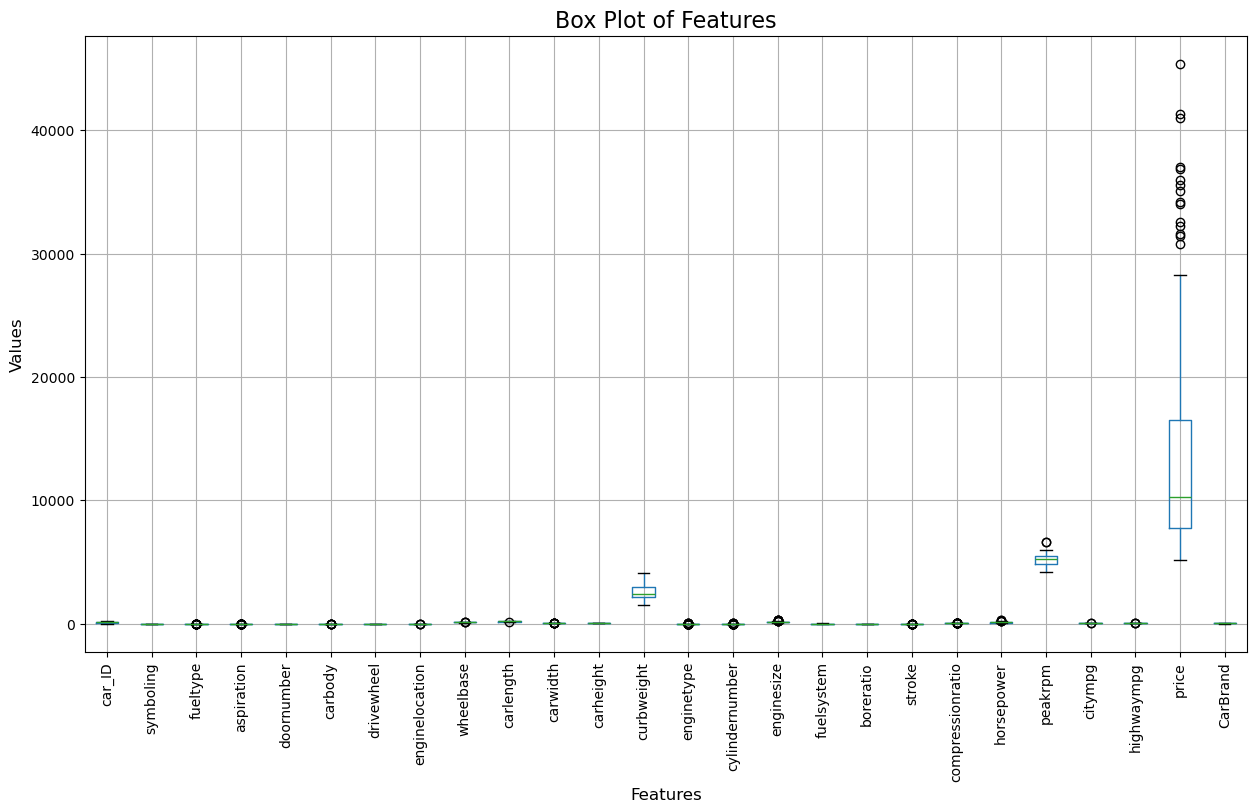

In [67]:
plt.figure(figsize=(15, 8))
df.boxplot(rot=90, grid=True)
plt.title("Box Plot of Features", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.show()

In [ ]:
# HISTOGRAM 

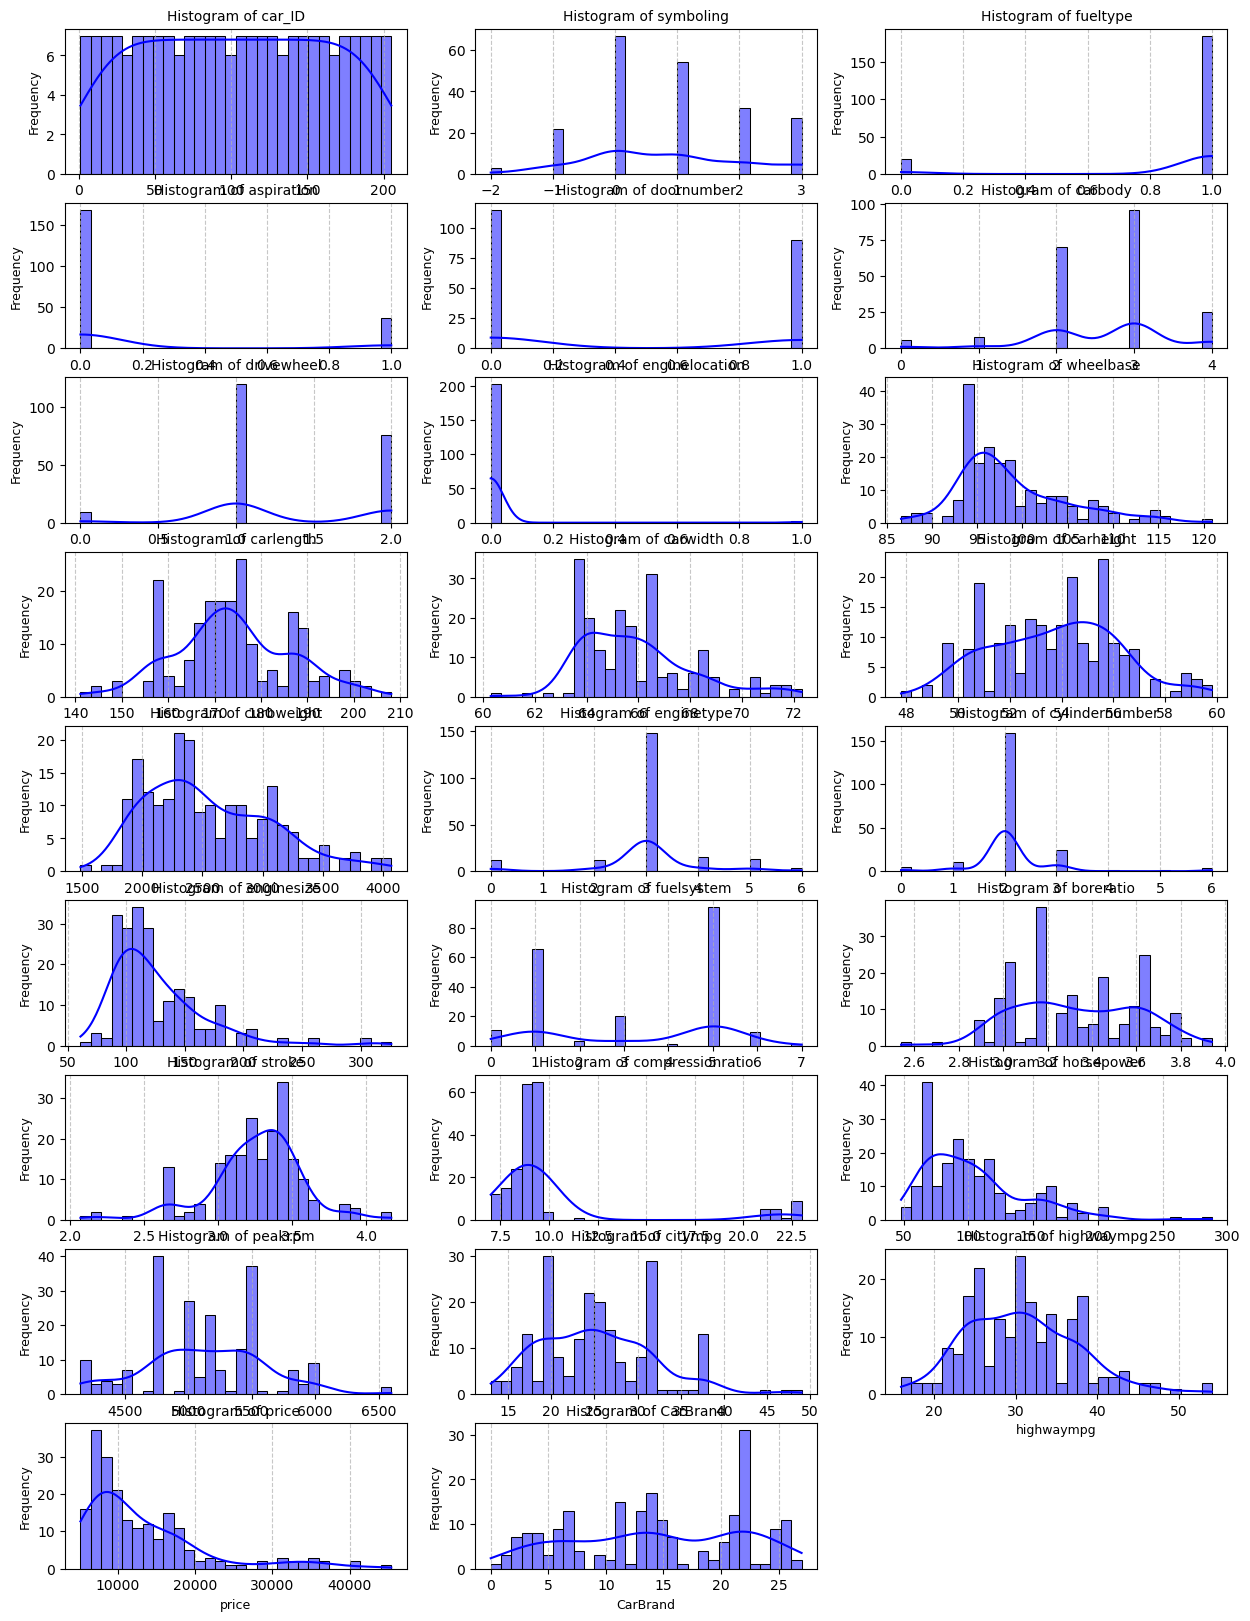

In [68]:
plt.figure(figsize=(15, 20))

for i, column in enumerate(df.columns, 1):
    plt.subplot((len(df.columns) + 2) // 3, 3, i)
    sns.histplot(data=df, x=column, kde=True, color='blue', bins=30)
    plt.title(f"Histogram of {column}", fontsize=10)
    plt.xlabel(column, fontsize=9)
    plt.ylabel("Frequency", fontsize=9)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

In [69]:
sel_df = df.select_dtypes(include=['int64', 'float64'])

In [70]:
sel_df

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [71]:
sel_df = df.select_dtypes(include=['int64', 'float64']).columns
for feature in sel_df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

In [72]:
skewness_report = {}
for feature in sel_df:
    skewness = df_clean[feature].skew()
    skewness_report[feature] = skewness
    print(f"Feature: {feature}, Skewness: {skewness}")
    if abs(skewness) > 0.75: 
        df_clean[feature] = np.log1p(df_clean[feature])

Feature: car_ID, Skewness: -0.06379958492649414
Feature: symboling, Skewness: 0.16030150524452705
Feature: wheelbase, Skewness: 0.9492691014658796
Feature: carlength, Skewness: -0.04879948610184413
Feature: carwidth, Skewness: 0.7071612552248826
Feature: carheight, Skewness: 0.10764950255741886
Feature: curbweight, Skewness: 0.43767570848288084
Feature: enginesize, Skewness: 0.6822743661152723
Feature: boreratio, Skewness: 0.08994403200635531
Feature: stroke, Skewness: -1.0289207795244792
Feature: compressionratio, Skewness: 2.5832049732628786
Feature: horsepower, Skewness: 0.8352507201100359
Feature: peakrpm, Skewness: 0.06090913210106845
Feature: citympg, Skewness: 0.7754437897652431
Feature: highwaympg, Skewness: 0.728458960695556
Feature: price, Skewness: 1.016915847190321


In [73]:
scaler = StandardScaler()
numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
df_clean[numerical_cols] = scaler.fit_transform(df_clean[numerical_cols])

In [ ]:
# Separate features and target variable

In [74]:
X = df_clean.drop('price', axis=1)
y = df_clean['price']

In [ ]:
# Split the data into training and testing sets

In [75]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Scale numerical features

In [76]:
ss=StandardScaler()

In [77]:
x_test_scaled=ss.fit_transform(x_test)
x_train_scaled=ss.fit_transform(x_train)

In [ ]:
# Initialize models

In [78]:
models={"Linear Regression":LinearRegression(),
        "Decision Tree Regressor":DecisionTreeRegressor(),
        "Raindom forest Regressor":RandomForestRegressor(),
        "Gradient Boosting Regressor":GradientBoostingRegressor(),
        "Support Vector Regressor":SVR()}
        

In [ ]:
# LinearRegression

In [79]:
model1=LinearRegression()

In [ ]:
# Train and evaluate each model

In [97]:
 results={}
for model_name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    results[model_name] = {"MSE": mse, "MAE": mae, "RMSE": rmse, "R2": r2}

In [ ]:
# Make predictions

In [113]:
results_df = pd.DataFrame(results).T
print(results_df)

                                  MSE       MAE      RMSE        R2
Linear Regression            0.416103  0.558048  0.645060  0.561504
Decision Tree Regressor      0.650364  0.716461  0.806451  0.314636
Raindom forest Regressor     0.335577  0.514915  0.579290  0.646364
Gradient Boosting Regressor  0.424455  0.582901  0.651502  0.552703
Support Vector Regressor     0.276152  0.410241  0.525501  0.708987


In [115]:
best_model_by_r2 = results_df.loc[results_df['R2'].idxmax()]
print("Best Model by R²:\n", best_model_by_r2)

Best Model by R²:
 MSE     0.276152
MAE     0.410241
RMSE    0.525501
R2      0.708987
Name: Support Vector Regressor, dtype: float64


In [ ]:
# MODEL SAVEING

In [103]:
import joblib

In [105]:
joblib.dump(model,'car project ml.joblib')

['car project ml.joblib']

In [ ]:
# MODEL IMPORTING

In [111]:
load_model=joblib.load("car project ml.joblib")
load_model

SVR()